# $P_{\text{gen}}$ distributions

If you want to compute the $P_{\text{gen}}$ counts by yourself, they can be obtained using IGoR (https://github.com/qmarcou/IGoR). Once IGoR is installed the command lines to compute the generation probabilites are:

```{sh}
WDPATH=/path/to/your/working/directory 

#Read the sequences 
igor -set_wd $WDPATH -batch foo -read_seqs ../demo/murugan_naive1_noncoding_demo_seqs.txt
#Align
igor -set_wd $WDPATH -batch foo -species human -chain beta -align --all
#Generate most probable scenario, compute generation probability
igor -set_wd $WDPATH -batch foo -species human -chain beta -evaluate -output --scenarios 1 --Pgen

```

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import matplotlib.pyplot as plt

fn_sample_alpha = "../Datas/Pgen/sample_alpha_output/Pgen_counts.csv"
fn_alpha_mc = "../Datas/Pgen/alpha_multiple_cells_output/Pgen_counts.csv"
fn_sample_beta = "../Datas/Pgen/sample_beta_output/Pgen_counts.csv"
fn_beta_mc = "../Datas/Pgen/beta_multiple_cells_output/Pgen_counts.csv"
fn_alpha_pairs = "../Datas/Pgen/alpha_pairs_output/Pgen_counts.csv"
fn_beta_pairs = "../Datas/Pgen/beta_pairs_output/Pgen_counts.csv"

In [4]:
df_sample_alpha = pd.read_csv(fn_sample_alpha, sep=";")
df_mc_alpha = pd.read_csv(fn_alpha_mc, sep=";")
df_pairs_alpha = pd.read_csv(fn_alpha_pairs, sep=";")

df_sample_beta = pd.read_csv(fn_sample_beta, sep=";")
df_mc_beta = pd.read_csv(fn_beta_mc, sep=";")
df_pairs_beta = pd.read_csv(fn_beta_pairs, sep=";")


In [5]:
print("mean of generic alpha sequences: ", np.mean(df_sample_alpha.Pgen_estimate))
print("mean of multiple-cells alpha sequences: ", np.mean(df_mc_alpha.Pgen_estimate))
print("mean of paired alpha sequences: ", np.mean(df_pairs_alpha.Pgen_estimate))

print("mean of generic beta sequences: ", np.mean(df_sample_beta.Pgen_estimate))
print("mean of multiple-cells beta sequences: ", np.mean(df_mc_beta.Pgen_estimate))
print("mean of paired beta sequences: ", np.mean(df_pairs_beta.Pgen_estimate))

mean of generic alpha sequences:  5.8808080796076006e-08
mean of multiple-cells alpha sequences:  5.513085928899452e-09
mean of paired alpha sequences:  1.5136040131815115e-08
mean of generic beta sequences:  6.930864846942774e-10
mean of multiple-cells beta sequences:  9.967153024486937e-11
mean of paired beta sequences:  1.5373710500207535e-10


<IPython.core.display.Javascript object>


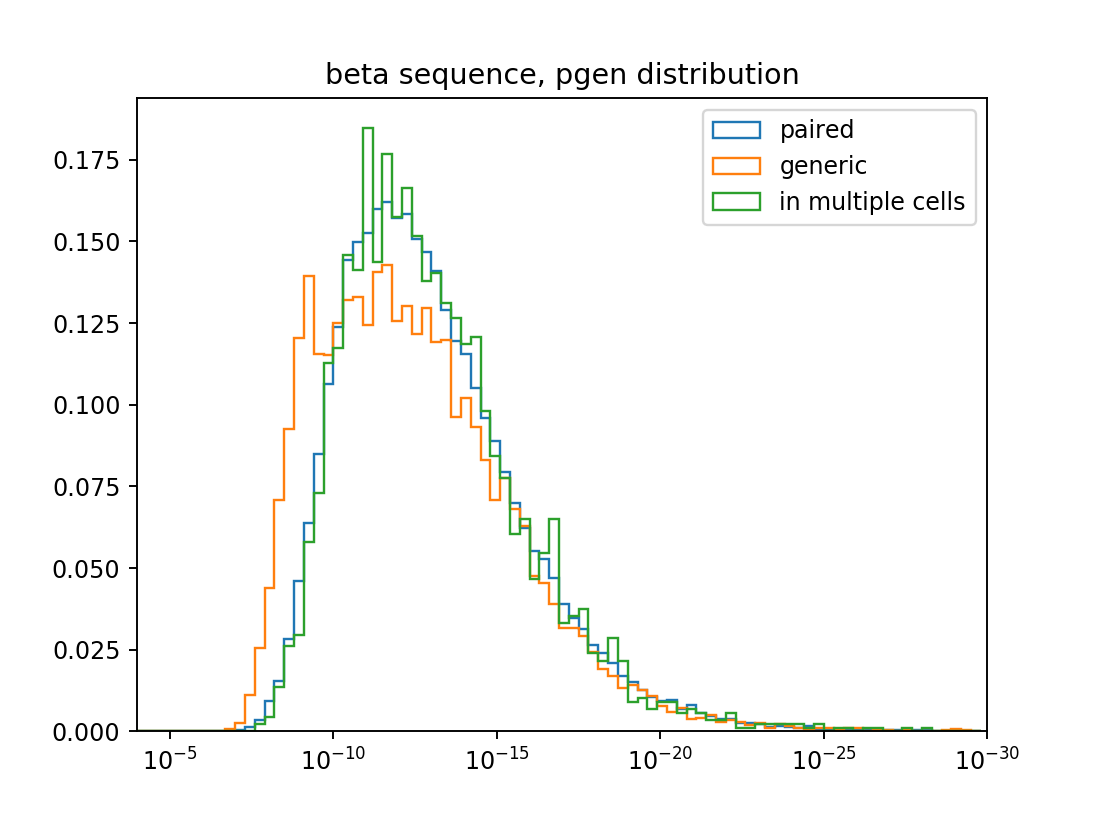

In [6]:
f, ax = plt.subplots()

bins = np.arange(4, 30,0.3)
plt.hist(-np.log10(df_pairs_beta.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="paired")
plt.hist(-np.log10(df_sample_beta.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="generic")
plt.hist(-np.log10(df_mc_beta.Pgen_estimate.dropna()), bins=bins, histtype='step', density=True, label="in multiple cells")

ax.set_xticks(range(5,40,5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(5,40,5)])
ax.set_xlim(4,30)


ax.set_title("beta sequence, pgen distribution")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


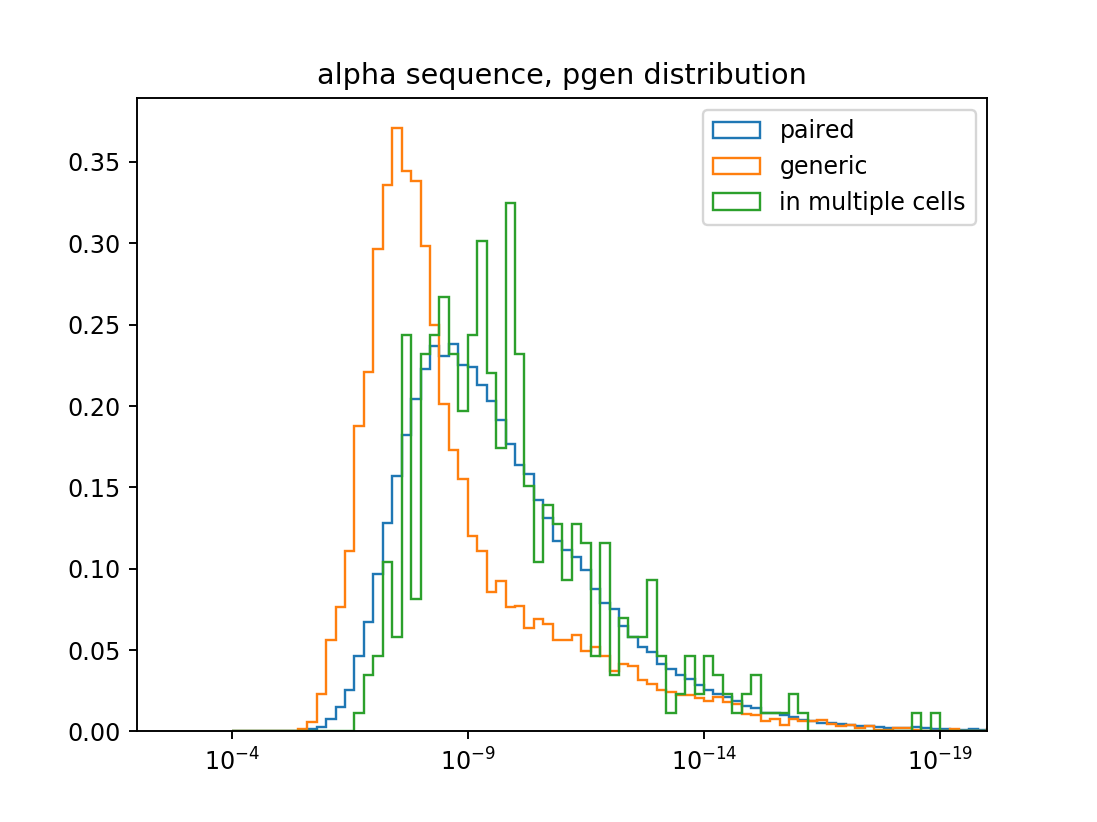

In [9]:
f, ax = plt.subplots()

bins = np.arange(4, 30,0.2)
plt.hist(-np.log10(df_pairs_alpha.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="paired")
plt.hist(-np.log10(df_sample_alpha.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="generic")
plt.hist(-np.log10(df_mc_alpha.Pgen_estimate.dropna()), bins=bins, histtype='step', density=True, label="in multiple cells")


ax.set_xticks(range(4,40,5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(4,40,5)])
ax.set_xlim(2,20)

ax.set_title("alpha sequence, pgen distribution")
ax.legend()
plt.show()

In [10]:
dfab = pd.merge(df_pairs_alpha, df_pairs_beta, on='seq_index', suffixes=["_alpha", "_beta"])
dfab["proba_totale"] = dfab.apply(lambda s: s.Pgen_estimate_alpha * s.Pgen_estimate_beta, axis=1)

In [11]:
dfab_random = pd.concat([dfab]*200)
dfab_random = dfab_random.apply(lambda x: x.sample(frac=1).values)
dfab_random["proba_totale"] = dfab_random.apply(lambda s: s.Pgen_estimate_alpha * s.Pgen_estimate_beta, axis=1)


<IPython.core.display.Javascript object>


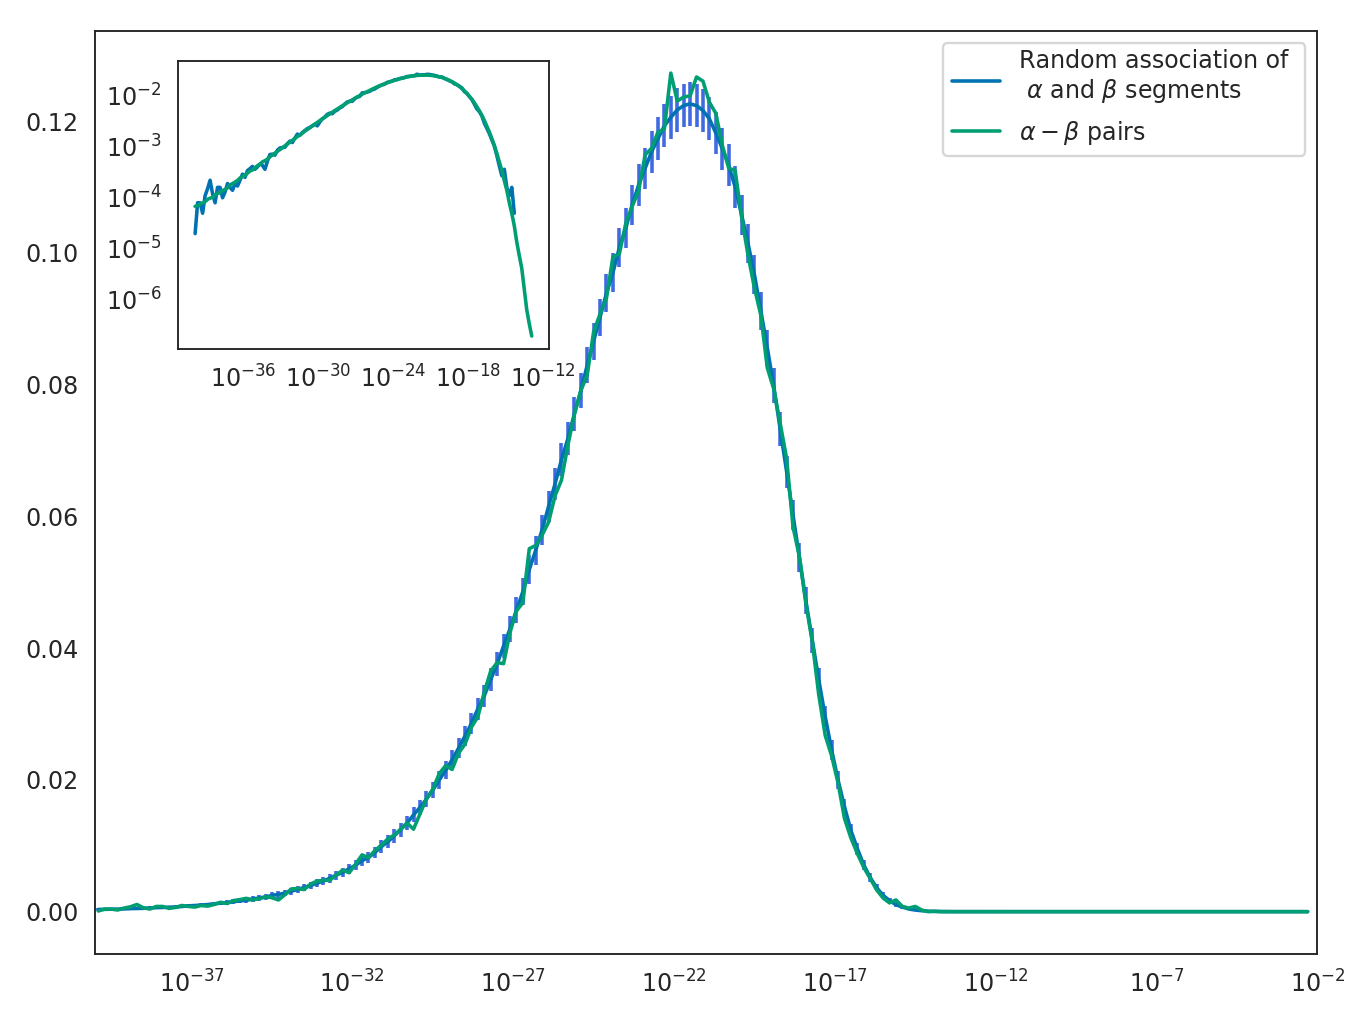

/home/tautilde/.local/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [15]:
plt.style.use('seaborn-colorblind')
sns.set_style(style='white')

fig, ax = plt.subplots(figsize=(8,6))
bins = np.arange(-40, -2,0.2)



hist, bin_edges = np.histogram(np.log10(dfab_random.proba_totale.dropna())
                               , bins, density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
ax.plot(bin_centers, hist, 
        label="Random association of \n $\\alpha$ and $\\beta$ segments")
#bin_centers = 0.5*(edges[:-1] + edges[1:])
entries=hist
hist, bin_edges = np.histogram(np.log10(dfab.proba_totale.dropna())
                               , bins, density=True)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
ax.plot(bin_centers, hist,  
                    label="$\\alpha-\\beta$ pairs")

# Poissonian error bar
plt.errorbar(bin_centers, entries, yerr=3*np.sqrt(entries/len(dfab.proba_totale.dropna())), fmt='none', ecolor='royalblue', elinewidth=1.5)

ax.set_xticks(range(-2,-40,-5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(2,40,5)])
ax.set_xlim(-40,-2)


left, bottom, width, height = [0.13, 0.66, 0.27, 0.28]
ax2 = fig.add_axes([left, bottom, width, height])
bins = np.power(10, np.arange(-40, -2,0.2))
hist, bin_edges = np.histogram(dfab.proba_totale.dropna()
                               , bins)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
hist = [a/np.sum(hist) if a != 0 else np.nan for a in hist]
ax2.loglog(bin_centers, hist,  
                    label="$\\alpha-\\beta$ pairs")

bins = np.power(10, np.arange(-40, -2,0.2))
hist, bin_edges = np.histogram(dfab_random.proba_totale.dropna()
                               , bins)
hist = [a/np.sum(hist) if a != 0 else np.nan for a in hist]
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
ax2.loglog(bin_centers, hist, 
        label="Randomly shuffled \n $\\alpha$ and $\\beta$")

ax.legend()
plt.tight_layout()
plt.savefig("histogram_proba_pairs.pdf")
plt.show()